<a href="https://colab.research.google.com/github/DevanshGoswami/TimeSeriesAnalysis/blob/master/ARIMA_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis of a Sample Series Using ARIMA Model 
**Devansh Goswami**


We have used various stats tool in the following model,

using the **Box-Jenkins** Approach for the modeling.

# **IDENTIFICATION**

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
df = pd.DataFrame(df)
print(df)
M = df['value'].dropna().mean()
df['value'] = df['value'].replace(np.NaN,M)
print(df)


           date      value
0    1991-07-01   3.526591
1    1991-08-01   3.180891
2    1991-09-01   3.252221
3    1991-10-01   3.611003
4    1991-11-01   3.565869
..          ...        ...
199  2008-02-01  21.654285
200  2008-03-01  18.264945
201  2008-04-01  23.107677
202  2008-05-01  22.912510
203  2008-06-01  19.431740

[204 rows x 2 columns]
           date      value
0    1991-07-01   3.526591
1    1991-08-01   3.180891
2    1991-09-01   3.252221
3    1991-10-01   3.611003
4    1991-11-01   3.565869
..          ...        ...
199  2008-02-01  21.654285
200  2008-03-01  18.264945
201  2008-04-01  23.107677
202  2008-05-01  22.912510
203  2008-06-01  19.431740

[204 rows x 2 columns]


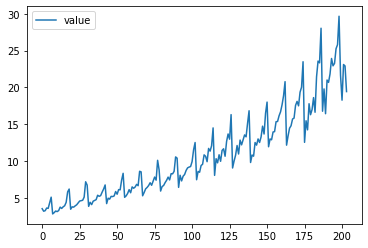

In [7]:
import matplotlib.pyplot as plt

df.plot()
plt.show()


In [9]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(df['value'])
print(result)
print(result[1])

(3.14518568930674, 1.0, 15, 188, {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}, 549.6705685364172)
1.0


(-2.495172147449743, 0.11665341686468694, 15, 187, {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}, 547.1880809726358)
0.11665341686468694


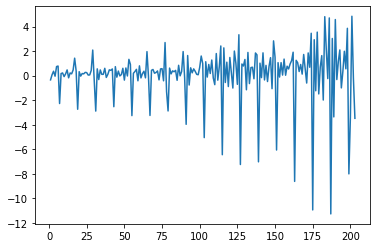

In [42]:
Dif = df['value'].diff().dropna()

result2 = adfuller(Dif)
print(result2)
print(result2[1])
Dif.plot()
plt.show()



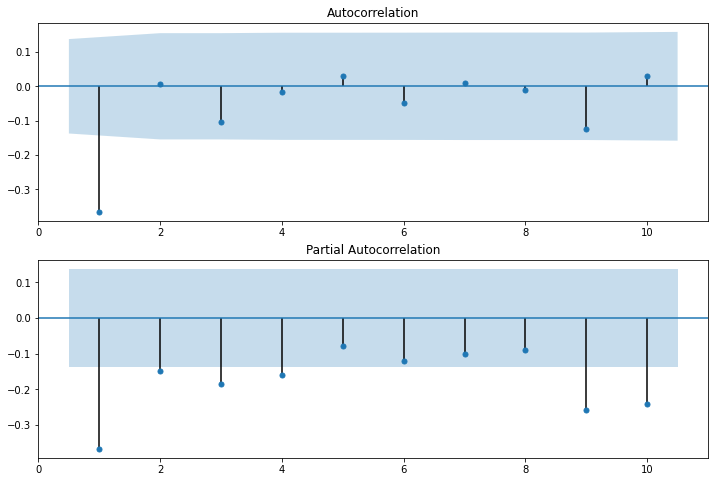

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(Dif, lags=10,zero=False,ax=ax1)
plot_pacf(Dif, lags=10,zero=False,ax=ax2)
plt.show()

# **ESTIMATION**

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_aic_bic = []
for p in range(7,10):
    for q in range(7,10):
        try:
                model = SARIMAX(Dif, order=(p,1,q))
                results = model.fit()
                order_aic_bic.append((p,q,results.aic,results.bic))
        except:
                order_aic_bic.append((p,q,None,None))

order_df = pd.DataFrame(order_aic_bic, columns=['p','q','AIC','BIC'])
print(order_df)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization faile

   p  q         AIC         BIC
0  7  7  759.583052  809.207067
1  7  8  769.896098  822.828381
2  7  9  775.209897  831.450448
3  8  7  760.375778  813.308061
4  8  8  749.751819  805.992370
5  8  9  782.378590  841.927409
6  9  7  764.017480  820.258031
7  9  8  805.943784  865.492603
8  9  9  783.750769  846.607856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# **MODEL DIAGNOSTICS**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                  value   No. Observations:                  203
Model:               SARIMAX(8, 1, 8)   Log Likelihood                -358.235
Date:                Sat, 30 May 2020   AIC                            752.469
Time:                        15:49:56   BIC                            812.018
Sample:                             0   HQIC                           776.563
                                - 203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0064      0.030      0.211      0.833      -0.053       0.066
ar.L1         -2.1848      0.194    -11.244      0.000      -2.566      -1.804
ar.L2         -2.7197      0.306     -8.882      0.0

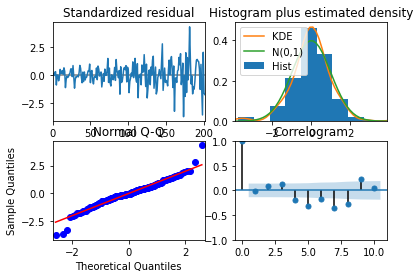

In [47]:
mod = SARIMAX(Dif, order=(8,1,8),trend='c')
res = mod.fit()
print(res.summary())
print(res.resid)
res.plot_diagnostics()
plt.show()

# **FORECASTING/PRODUCTION**

In [55]:
forecast = res.get_forecast(steps=20)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
print(confidence_intervals)
print("-------------------------------------------------")
print(mean_forecast)

     lower value  upper value
203     1.035400     6.285029
204    -6.014626    -0.369399
205    -2.048743     3.620517
206    -5.783715     0.022788
207    -0.246218     5.870159
208     0.472858     6.614806
209    -4.036313     2.111433
210    -5.904351     0.284956
211    -4.756602     1.496386
212    -1.170966     5.354099
213    -1.021599     5.646481
214    -4.520197     2.298598
215    -1.960185     4.997141
216    -5.230517     1.787337
217    -3.465352     3.609436
218    -6.332522     0.744234
219    -0.186851     6.932696
220    -1.132719     5.989456
221    -3.316067     3.806335
222    -7.280780    -0.081239
-------------------------------------------------
203    3.660215
204   -3.192013
205    0.785887
206   -2.880464
207    2.811971
208    3.543832
209   -0.962440
210   -2.809697
211   -1.630108
212    2.091567
213    2.312441
214   -1.110799
215    1.518478
216   -1.721590
217    0.072042
218   -2.794144
219    3.372922
220    2.428369
221    0.245134
222   -3.681010


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [0]:
ll = confidence_intervals.loc[:,'lower value']
ul = confidence_intervals.loc[:,'upper value']


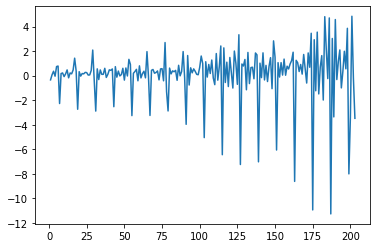

In [62]:
plt.plot(Dif.index,Dif, label='observed')


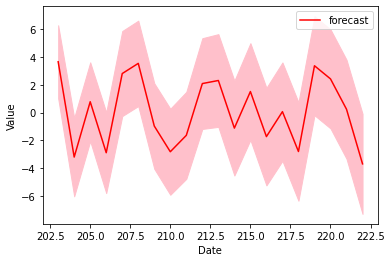

In [63]:
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
plt.fill_between(mean_forecast.index,ll,ul,color='pink')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# -------------------------THANK YOU-------------------------